# Sentimen Analisis 

Di notebook ini saya menganalisis Facebook Review pada Google Play Store

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from nltk.stem import SnowballStemmer # Text Pre-processing
import nltk
nltk.download('stopwords') # Text stopwords

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Disable (false positive) warning 
pd.options.mode.chained_assignment = None  # default='warn'

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/kaggle/input/facebook-review/Facebook reviews 2.csv
/kaggle/input/facebook-review/facebook review.xlsx
/kaggle/input/facebook-review/Facebook reviews 2.xlsx
/kaggle/input/abbreviations-and-slangs-for-text-preprocessing/Abbreviations and Slang.csv
/kaggle/input/stop-words-in-28-languages/vietnamese.txt
/kaggle/input/stop-words-in-28-languages/bulgarian.txt
/kaggle/input/stop-words-in-28-languages/ukrainian.txt
/kaggle/input/stop-words-in-28-languages/swedish.txt
/kaggle/input/stop-words-in-28-languages/danish.txt
/kaggle/input/stop-words-in-28-languages/dutch.txt
/kaggle/input/stop-words-in-28-languages/russian.txt
/kaggle/input/stop-words-in-28-languages/slovak.txt
/kaggle/input/stop-words-in-28-languages/hungarian.txt
/kaggle/input/stop-words-in-28-languages/czech.txt
/kaggle/input/stop-words-in-28-languages/turkish.txt
/kaggle/input/stop-words-in-28-languages/m

Bisa dilihat, pada notebook ini menggunakan library numpy, pandas, nltk, and snowballstemmer

In [2]:
import pandas
df = pandas.read_excel('/kaggle/input/facebook-review/Facebook reviews 2.xlsx', index_col=0)
df.head()

,Name,userImage,Comments,score,Helpful,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,sortOrder,appId
1,Charity Muffley,https://play-lh.googleusercontent.com/a-/ALV-U...,"Ever since I updated the app, nothing seems to...",1,9059,434.0.0.36.115,2023-10-01 15:46:31,NaN,NaN,434.0.0.36.115,most_relevant,com.facebook.katana
2,Dustin Harmon,https://play-lh.googleusercontent.com/a-/ALV-U...,App doesn't work most of the time. Besides all...,1,5090,435.0.0.42.112,2023-10-10 03:58:07,NaN,NaN,435.0.0.42.112,most_relevant,com.facebook.katana
3,Danielle Hopkins,https://play-lh.googleusercontent.com/a/ACg8oc...,"I'm not sure what is going on, but lately, as ...",1,5154,434.0.0.36.115,2023-10-03 07:41:22,NaN,NaN,434.0.0.36.115,most_relevant,com.facebook.katana
4,Sarah Leather,https://play-lh.googleusercontent.com/a-/ALV-U...,There's always something broken in this app. T...,1,3960,433.0.0.31.111,2023-09-23 23:52:36,NaN,NaN,433.0.0.31.111,most_relevant,com.facebook.katana
5,Eleanor Scott,https://play-lh.googleusercontent.com/a/ACg8oc...,This ad is the hardest ad to x out of. I think...,1,475,431.0.0.30.108,2023-10-16 02:10:46,NaN,NaN,431.0.0.30.108,most_relevant,com.facebook.katana


In [3]:
df

,Name,userImage,Comments,score,Helpful,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,sortOrder,appId
1,Charity Muffley,https://play-lh.googleusercontent.com/a-/ALV-U...,"Ever since I updated the app, nothing seems to...",1,9059,434.0.0.36.115,2023-10-01 15:46:31,NaN,NaN,434.0.0.36.115,most_relevant,com.facebook.katana
2,Dustin Harmon,https://play-lh.googleusercontent.com/a-/ALV-U...,App doesn't work most of the time. Besides all...,1,5090,435.0.0.42.112,2023-10-10 03:58:07,NaN,NaN,435.0.0.42.112,most_relevant,com.facebook.katana
3,Danielle Hopkins,https://play-lh.googleusercontent.com/a/ACg8oc...,"I'm not sure what is going on, but lately, as ...",1,5154,434.0.0.36.115,2023-10-03 07:41:22,NaN,NaN,434.0.0.36.115,most_relevant,com.facebook.katana
4,Sarah Leather,https://play-lh.googleusercontent.com/a-/ALV-U...,There's always something broken in this app. T...,1,3960,433.0.0.31.111,2023-09-23 23:52:36,NaN,NaN,433.0.0.31.111,most_relevant,com.facebook.katana
5,Eleanor Scott,https://play-lh.googleusercontent.com/a/ACg8oc...,This ad is the hardest ad to x out of. I think...,1,475,431.0.0.30.108,2023-10-16 02:10:46,NaN,NaN,431.0.0.30.108,most_relevant,com.facebook.katana
...,...,...,...,...,...,...,...,...,...,...,...,...
2396,Jawed ali Iqubal,https://play-lh.googleusercontent.com/a/ACg8oc...,"Ea eamar satha a was eewa wto,wz Rd tx s xaqVt...",5,0,436.0.0.35.101,2023-10-18 13:17:59,NaN,NaN,436.0.0.35.101,newest,com.facebook.katana
2397,rayjohn trajeco,https://play-lh.googleusercontent.com/a-/ALV-U...,Awesome,5,0,436.0.0.35.101,2023-10-18 13:17:19,NaN,NaN,436.0.0.35.101,newest,com.facebook.katana
2398,Dumbi Boipai,https://play-lh.googleusercontent.com/a/ACg8oc...,Eg,5,0,NaN,2023-10-18 13:16:05,NaN,NaN,NaN,newest,com.facebook.katana
2399,Kailsh Majhi,https://play-lh.googleusercontent.com/a/ACg8oc...,Ok,5,0,NaN,2023-10-18 13:15:46,NaN,NaN,NaN,newest,com.facebook.katana


Hasil dataset didapatkan ada 7 kolom yaitu kolom App-Name, Company_Name, Page_URL, Name, Star_rating, Helpful, dan Comments. Data yang di dapatkan sebanyak 160 data dan bertipe data object, int, dan float.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2400 entries, 1 to 2400
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Name                  2400 non-null   object        
 1   userImage             2400 non-null   object        
 2   Comments              2399 non-null   object        
 3   score                 2400 non-null   int64         
 4   Helpful               2400 non-null   int64         
 5   reviewCreatedVersion  2155 non-null   object        
 6   at                    2400 non-null   datetime64[ns]
 7   replyContent          0 non-null      float64       
 8   repliedAt             0 non-null      float64       
 9   appVersion            2155 non-null   object        
 10  sortOrder             2400 non-null   object        
 11  appId                 2400 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(7)
memory usage: 243.8+ KB


In [5]:
data = df[['Name', 'score', 'Helpful' ,'Comments']]

data .head()

,Name,score,Helpful,Comments
1,Charity Muffley,1,9059,"Ever since I updated the app, nothing seems to..."
2,Dustin Harmon,1,5090,App doesn't work most of the time. Besides all...
3,Danielle Hopkins,1,5154,"I'm not sure what is going on, but lately, as ..."
4,Sarah Leather,1,3960,There's always something broken in this app. T...
5,Eleanor Scott,1,475,This ad is the hardest ad to x out of. I think...


Pada proses ini saya membuat variable baru yaitu data

# Text Preprocessing

Salah satu cara dalam teks mining, dimana teks dirubah ke string dan diolah untuk tahap selanjutnya

In [6]:
#import nltk

In [7]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /usr/share/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /usr/share/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /usr/share/nltk_data...
[nltk_data]    | Downloading pa

True

Mengubah tipe data kolom comment menjadi string agar dapat melakukan pemrosesan data teks

In [8]:
data['Comments'] = data['Comments'].astype(str)

**Case Folding (lower)**

In [9]:
data['Comments'] = data['Comments'].str.lower()

data

,Name,score,Helpful,Comments
1,Charity Muffley,1,9059,"ever since i updated the app, nothing seems to..."
2,Dustin Harmon,1,5090,app doesn't work most of the time. besides all...
3,Danielle Hopkins,1,5154,"i'm not sure what is going on, but lately, as ..."
4,Sarah Leather,1,3960,there's always something broken in this app. t...
5,Eleanor Scott,1,475,this ad is the hardest ad to x out of. i think...
...,...,...,...,...
2396,Jawed ali Iqubal,5,0,"ea eamar satha a was eewa wto,wz rd tx s xaqvt..."
2397,rayjohn trajeco,5,0,awesome
2398,Dumbi Boipai,5,0,eg
2399,Kailsh Majhi,5,0,ok


**Tokenizing** (Ditahap ini akan dilakukan proses number removal, whitecase removal, punctuation removal dan word_tokenize() untuk memecah string kedalam tokens)

In [10]:
import string 
import re 
from nltk.tokenize import word_tokenize 
from nltk.probability import FreqDist

def remove_links(text):
    # menghapus tab, new line, ans back slice
    text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
    # menghapus non ASCII (emoticon, chinese word, .etc)
    text = text.encode('ascii', 'replace').decode('ascii')
    # menghapus mention, link, hashtag
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())
    # menghapus URL
    return text.replace("http://", " ").replace("https://", " ")
                
data['Comments'] = data['Comments'].apply(remove_links)

In [11]:
#menghapus number
def remove_number(text):
    return  re.sub(r"\d+", " ", text)

data['Comments'] = data['Comments'].apply(remove_number)

In [12]:
#menghapus punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans("","",string.punctuation))

data['Comments'] = data['Comments'].apply(remove_punctuation)

In [13]:
# menghapus single char
def remove_singl_char(text):
    return re.sub(r"\b[a-zA-Z]\b", " ", text)

data['Comments'] = data['Comments'].apply(remove_singl_char)

In [14]:
# Tokenisasi 
def word_tokenize_wrapper(text):
    return word_tokenize(text)

data['Comments_tokenize'] = data['Comments'].apply(word_tokenize_wrapper)

In [15]:
data

,Name,score,Helpful,Comments,Comments_tokenize
1,Charity Muffley,1,9059,ever since updated the app nothing seems to ...,"[ever, since, updated, the, app, nothing, seem..."
2,Dustin Harmon,1,5090,app doesnt work most of the time besides all t...,"[app, doesnt, work, most, of, the, time, besid..."
3,Danielle Hopkins,1,5154,im not sure what is going on but lately as a...,"[im, not, sure, what, is, going, on, but, late..."
4,Sarah Leather,1,3960,theres always something broken in this app the...,"[theres, always, something, broken, in, this, ..."
5,Eleanor Scott,1,475,this ad is the hardest ad to out of think ...,"[this, ad, is, the, hardest, ad, to, out, of, ..."
...,...,...,...,...,...
2396,Jawed ali Iqubal,5,0,ea eamar satha was eewa wtowz rd tx xaqvtb...,"[ea, eamar, satha, was, eewa, wtowz, rd, tx, x..."
2397,rayjohn trajeco,5,0,awesome,[awesome]
2398,Dumbi Boipai,5,0,eg,[eg]
2399,Kailsh Majhi,5,0,ok,[ok]


In [16]:
# Menghitung Distibusi Persebaran Kata
def freqDist_wrapper(text):
    return FreqDist(text)

Comments_fqsist = data['Comments_tokenize'].apply(freqDist_wrapper)

print('Frequency Tokens : \n') 
print(Comments_fqsist.head().apply(lambda x : x.most_common()))

Frequency Tokens : 

1    [(and, 3), (work, 2), (properly, 2), (cant, 2)...
2    [(the, 4), (to, 4), (videos, 3), (and, 3), (vi...
3    [(on, 4), (is, 3), (the, 3), (it, 3), (and, 3)...
4    [(the, 8), (app, 3), (in, 2), (for, 2), (to, 2...
5    [(the, 8), (to, 6), (you, 6), (ad, 5), (it, 5)...
Name: Comments_tokenize, dtype: object


**Normalisasi** ( Pada proses ini akan membersihkan kata yang berupa kata sehari-hari/slank words yang masih berantakan agar menjadi kata indonesia yang benar)

In [17]:
normalizad_word = pd.read_csv("/kaggle/input/abbreviations-and-slangs-for-text-preprocessing/Abbreviations and Slang.csv")

normalizad_word_dict = {}

for index, row in normalizad_word.iterrows():
    if row[0] not in normalizad_word_dict:
        normalizad_word_dict[row[0]] = row[1] 

def normalized_term(document):
    return [normalizad_word_dict[term] if term in normalizad_word_dict else term for term in document]

In [18]:
data['Comments_normalized'] = data['Comments_tokenize'].apply(normalized_term)

Setelah proses diatas disimpan dalam kolom baru yaitu kolom Comments_normalized dimana data teks menyisakan kata yang sudah dinormalisasi.

In [19]:
data

,Name,score,Helpful,Comments,Comments_tokenize,Comments_normalized
1,Charity Muffley,1,9059,ever since updated the app nothing seems to ...,"[ever, since, updated, the, app, nothing, seem...","[ever, since, updated, the, app, nothing, seem..."
2,Dustin Harmon,1,5090,app doesnt work most of the time besides all t...,"[app, doesnt, work, most, of, the, time, besid...","[app, doesnt, work, most, of, the, time, besid..."
3,Danielle Hopkins,1,5154,im not sure what is going on but lately as a...,"[im, not, sure, what, is, going, on, but, late...","[im, not, sure, what, is, going, on, but, late..."
4,Sarah Leather,1,3960,theres always something broken in this app the...,"[theres, always, something, broken, in, this, ...","[theres, always, something, broken, in, this, ..."
5,Eleanor Scott,1,475,this ad is the hardest ad to out of think ...,"[this, ad, is, the, hardest, ad, to, out, of, ...","[this, ad, is, the, hardest, ad, to, out, of, ..."
...,...,...,...,...,...,...
2396,Jawed ali Iqubal,5,0,ea eamar satha was eewa wtowz rd tx xaqvtb...,"[ea, eamar, satha, was, eewa, wtowz, rd, tx, x...","[ea, eamar, satha, was, eewa, wtowz, rd, tx, x..."
2397,rayjohn trajeco,5,0,awesome,[awesome],[awesome]
2398,Dumbi Boipai,5,0,eg,[eg],[eg]
2399,Kailsh Majhi,5,0,ok,[ok],[ok]


**Filtering** (Stopword Removal) Pada tahap ini kita akan menggunakan stopword bahasa indonesia yang didapatkan dari library NLTK untuk filtering terhadap Dataframe.

In [20]:
from nltk.corpus import stopwords

In [21]:
list_stopwords = stopwords.words('english')

In [22]:
#remove stopword pada list token
def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]

data['Comments_stop_removed'] = data['Comments_normalized'].apply(stopwords_removal)

Setelah proses diatas disimpan dalam kolom baru yaitu kolom Comments_stop_removed dimana data teks menyisakan kata bermakna.

In [23]:
data

,Name,score,Helpful,Comments,Comments_tokenize,Comments_normalized,Comments_stop_removed
1,Charity Muffley,1,9059,ever since updated the app nothing seems to ...,"[ever, since, updated, the, app, nothing, seem...","[ever, since, updated, the, app, nothing, seem...","[ever, since, updated, app, nothing, seems, wo..."
2,Dustin Harmon,1,5090,app doesnt work most of the time besides all t...,"[app, doesnt, work, most, of, the, time, besid...","[app, doesnt, work, most, of, the, time, besid...","[app, doesnt, work, time, besides, deceptive, ..."
3,Danielle Hopkins,1,5154,im not sure what is going on but lately as a...,"[im, not, sure, what, is, going, on, but, late...","[im, not, sure, what, is, going, on, but, late...","[im, sure, going, lately, looking, marketplace..."
4,Sarah Leather,1,3960,theres always something broken in this app the...,"[theres, always, something, broken, in, this, ...","[theres, always, something, broken, in, this, ...","[theres, always, something, broken, app, featu..."
5,Eleanor Scott,1,475,this ad is the hardest ad to out of think ...,"[this, ad, is, the, hardest, ad, to, out, of, ...","[this, ad, is, the, hardest, ad, to, out, of, ...","[ad, hardest, ad, think, make, ads, impossible..."
...,...,...,...,...,...,...,...
2396,Jawed ali Iqubal,5,0,ea eamar satha was eewa wtowz rd tx xaqvtb...,"[ea, eamar, satha, was, eewa, wtowz, rd, tx, x...","[ea, eamar, satha, was, eewa, wtowz, rd, tx, x...","[ea, eamar, satha, eewa, wtowz, rd, tx, xaqvtb..."
2397,rayjohn trajeco,5,0,awesome,[awesome],[awesome],[awesome]
2398,Dumbi Boipai,5,0,eg,[eg],[eg],[eg]
2399,Kailsh Majhi,5,0,ok,[ok],[ok],[ok]


**Stemming** ( Mencari kata dasar dari sebuah kata/menghapus imbuhan kata )

In [24]:
#!pip install --upgrade pip

In [25]:
stemmer = nltk.SnowballStemmer("english")

def stemmed_wrapper(term): 
    return stemmer.stem(term)

term_dict = {}

for document in data['Comments_stop_removed']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '
            
print(len(term_dict))
print("------------------------")

for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    print(term,":" ,term_dict[term])
    
print(term_dict)
print("------------------------")


# apply stemmed term to dataframe
def get_stemmed_term(document):
    return [term_dict[term] for term in document]

data['Comments_Stemmed'] = data['Comments_stop_removed'].apply(get_stemmed_term)

5319
------------------------
ever : ever
since : sinc
updated : updat
app : app
nothing : noth
seems : seem
work : work
properly : proper
cant : cant
load : load
notifications : notif
page : page
posts : post
dont : dont
show : show
even : even
view : view
friends : friend
pages : page
ive : ive
contacted : contact
support : support
reply : repli
going : go
everything : everyth
works : work
laptop : laptop
browser : browser
uninstalled : uninstal
tried : tri
installing : instal
devices : devic
still : still
doesnt : doesnt
time : time
besides : besid
deceptive : decept
ads : ad
videos : video
general : general
theres : there
major : major
issue : issu
playing : play
often : often
times : time
either : either
one : one
ad : ad
twice : twice
row : row
absolutely : absolut
refusing : refus
video : video
resolution : resolut
watch : watch
try : tri
find : find
youtube : youtub
wont : wont
able : abl
see : see
samsung : samsung
galaxy : galaxi
tab : tab
im : im
sure : sure
lately : late
lo

Setelah proses diatas disimpan dalam kolom baru yaitu kolom Comments_stemmed dimana data teks menyisakan kata yang sudah di stemming.

In [26]:
data

,Name,score,Helpful,Comments,Comments_tokenize,Comments_normalized,Comments_stop_removed,Comments_Stemmed
1,Charity Muffley,1,9059,ever since updated the app nothing seems to ...,"[ever, since, updated, the, app, nothing, seem...","[ever, since, updated, the, app, nothing, seem...","[ever, since, updated, app, nothing, seems, wo...","[ever, sinc, updat, app, noth, seem, work, pro..."
2,Dustin Harmon,1,5090,app doesnt work most of the time besides all t...,"[app, doesnt, work, most, of, the, time, besid...","[app, doesnt, work, most, of, the, time, besid...","[app, doesnt, work, time, besides, deceptive, ...","[app, doesnt, work, time, besid, decept, ad, v..."
3,Danielle Hopkins,1,5154,im not sure what is going on but lately as a...,"[im, not, sure, what, is, going, on, but, late...","[im, not, sure, what, is, going, on, but, late...","[im, sure, going, lately, looking, marketplace...","[im, sure, go, late, look, marketplac, watch, ..."
4,Sarah Leather,1,3960,theres always something broken in this app the...,"[theres, always, something, broken, in, this, ...","[theres, always, something, broken, in, this, ...","[theres, always, something, broken, app, featu...","[there, alway, someth, broken, app, featur, hi..."
5,Eleanor Scott,1,475,this ad is the hardest ad to out of think ...,"[this, ad, is, the, hardest, ad, to, out, of, ...","[this, ad, is, the, hardest, ad, to, out, of, ...","[ad, hardest, ad, think, make, ads, impossible...","[ad, hardest, ad, think, make, ad, imposs, eve..."
...,...,...,...,...,...,...,...,...
2396,Jawed ali Iqubal,5,0,ea eamar satha was eewa wtowz rd tx xaqvtb...,"[ea, eamar, satha, was, eewa, wtowz, rd, tx, x...","[ea, eamar, satha, was, eewa, wtowz, rd, tx, x...","[ea, eamar, satha, eewa, wtowz, rd, tx, xaqvtb...","[ea, eamar, satha, eewa, wtowz, rd, tx, xaqvtb..."
2397,rayjohn trajeco,5,0,awesome,[awesome],[awesome],[awesome],[awesom]
2398,Dumbi Boipai,5,0,eg,[eg],[eg],[eg],[eg]
2399,Kailsh Majhi,5,0,ok,[ok],[ok],[ok],[ok]


In [27]:
data["Comments_clean"] = [' '.join(map(str, l)) for l in data['Comments_Stemmed']]

Setelah proses diatas disimpan dalam kolom baru yaitu kolom Comments_clean dimana saya menggabungkan lagi kalimat yang sebelumnya sudah ditokenisasi dan dibersihkan.

In [28]:
data

,Name,score,Helpful,Comments,Comments_tokenize,Comments_normalized,Comments_stop_removed,Comments_Stemmed,Comments_clean
1,Charity Muffley,1,9059,ever since updated the app nothing seems to ...,"[ever, since, updated, the, app, nothing, seem...","[ever, since, updated, the, app, nothing, seem...","[ever, since, updated, app, nothing, seems, wo...","[ever, sinc, updat, app, noth, seem, work, pro...",ever sinc updat app noth seem work proper cant...
2,Dustin Harmon,1,5090,app doesnt work most of the time besides all t...,"[app, doesnt, work, most, of, the, time, besid...","[app, doesnt, work, most, of, the, time, besid...","[app, doesnt, work, time, besides, deceptive, ...","[app, doesnt, work, time, besid, decept, ad, v...",app doesnt work time besid decept ad video pos...
3,Danielle Hopkins,1,5154,im not sure what is going on but lately as a...,"[im, not, sure, what, is, going, on, but, late...","[im, not, sure, what, is, going, on, but, late...","[im, sure, going, lately, looking, marketplace...","[im, sure, go, late, look, marketplac, watch, ...",im sure go late look marketplac watch reel scr...
4,Sarah Leather,1,3960,theres always something broken in this app the...,"[theres, always, something, broken, in, this, ...","[theres, always, something, broken, in, this, ...","[theres, always, something, broken, app, featu...","[there, alway, someth, broken, app, featur, hi...",there alway someth broken app featur hide page...
5,Eleanor Scott,1,475,this ad is the hardest ad to out of think ...,"[this, ad, is, the, hardest, ad, to, out, of, ...","[this, ad, is, the, hardest, ad, to, out, of, ...","[ad, hardest, ad, think, make, ads, impossible...","[ad, hardest, ad, think, make, ad, imposs, eve...",ad hardest ad think make ad imposs everi time ...
...,...,...,...,...,...,...,...,...,...
2396,Jawed ali Iqubal,5,0,ea eamar satha was eewa wtowz rd tx xaqvtb...,"[ea, eamar, satha, was, eewa, wtowz, rd, tx, x...","[ea, eamar, satha, was, eewa, wtowz, rd, tx, x...","[ea, eamar, satha, eewa, wtowz, rd, tx, xaqvtb...","[ea, eamar, satha, eewa, wtowz, rd, tx, xaqvtb...",ea eamar satha eewa wtowz rd tx xaqvtbunaqvn c...
2397,rayjohn trajeco,5,0,awesome,[awesome],[awesome],[awesome],[awesom],awesom
2398,Dumbi Boipai,5,0,eg,[eg],[eg],[eg],[eg],eg
2399,Kailsh Majhi,5,0,ok,[ok],[ok],[ok],[ok],ok


lalu disimpan di excel

In [29]:
data.to_excel("facebook_text.xlsx")

# Word Distribution

Disini kita mencari frekuensi data yang banyak digunakan

In [30]:
comments = ' '.join(str(v) for v in data['Comments_clean'])

In [31]:
tokenize_comments = word_tokenize(comments)

In [32]:
tokenize_comments

['ever',
 'sinc',
 'updat',
 'app',
 'noth',
 'seem',
 'work',
 'proper',
 'cant',
 'load',
 'notif',
 'page',
 'post',
 'dont',
 'show',
 'cant',
 'even',
 'view',
 'friend',
 'page',
 'ive',
 'contact',
 'support',
 'repli',
 'go',
 'everyth',
 'work',
 'proper',
 'laptop',
 'browser',
 'ive',
 'uninstal',
 'even',
 'tri',
 'instal',
 'devic',
 'still',
 'doesnt',
 'work',
 'app',
 'doesnt',
 'work',
 'time',
 'besid',
 'decept',
 'ad',
 'video',
 'post',
 'general',
 'there',
 'major',
 'issu',
 'play',
 'video',
 'video',
 'often',
 'time',
 'load',
 'ad',
 'either',
 'one',
 'ad',
 'twice',
 'row',
 'absolut',
 'refus',
 'load',
 'video',
 'there',
 'resolut',
 'watch',
 'video',
 'tri',
 'find',
 'youtub',
 'wont',
 'abl',
 'see',
 'video',
 'samsung',
 'galaxi',
 'samsung',
 'galaxi',
 'tab',
 'im',
 'sure',
 'go',
 'late',
 'look',
 'marketplac',
 'watch',
 'reel',
 'scroll',
 'feed',
 'app',
 'close',
 'automat',
 'dont',
 'accident',
 'press',
 'anyth',
 'happen',
 'multipl',

In [33]:
fqdist = FreqDist(tokenize_comments)

In [34]:
fqdist

FreqDist({'app': 852, 'facebook': 687, 'video': 461, 'updat': 404, 'use': 362, 'like': 339, 'get': 336, 'post': 316, 'cant': 314, 'fix': 308, ...})

In [35]:
# mencetak 15 kata paling banyak digunakan
fqdist.most_common(15)

[('app', 852),
 ('facebook', 687),
 ('video', 461),
 ('updat', 404),
 ('use', 362),
 ('like', 339),
 ('get', 336),
 ('post', 316),
 ('cant', 314),
 ('fix', 308),
 ('time', 289),
 ('pleas', 288),
 ('dont', 281),
 ('good', 254),
 ('work', 232)]

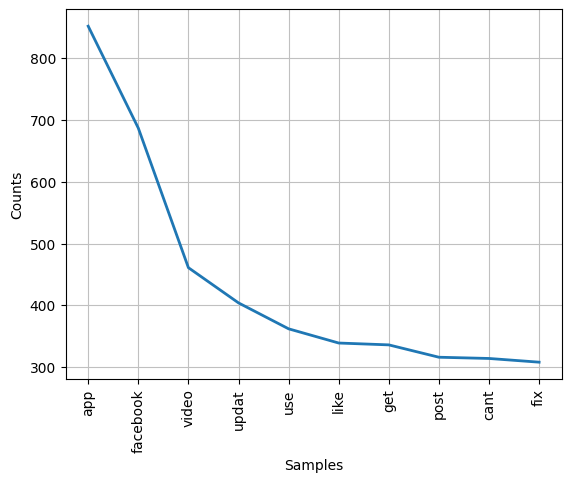

In [36]:
import matplotlib.pyplot as plt

# plotting
fqdist.plot(10,cumulative=False)
plt.show()

* Hasil yang dapat dilihat dari visualisasi persebaran kata yang paling banyak muncul yaitu kata 'app' yang merupakan kata ganti 

# Labeling

Pembagian data menjadi data sentimen berlabel positif dan negatif dengan angka 1 untuk positif dan angka 0 untuk negatif. Pengklasifikasian ini dilakukan pada comment yang memiliki rating 4 dan 5 sebagai sentimen positif dan rating 3 sampai 1 sebagai sentimen negatif.

In [37]:
label = []
for index, row in data.iterrows():
    if row["score"] == 5 or row["score"] == 4:
        label.append(1)
    else:
        label.append(0)

data["label"] = label

data

,Name,score,Helpful,Comments,Comments_tokenize,Comments_normalized,Comments_stop_removed,Comments_Stemmed,Comments_clean,label
1,Charity Muffley,1,9059,ever since updated the app nothing seems to ...,"[ever, since, updated, the, app, nothing, seem...","[ever, since, updated, the, app, nothing, seem...","[ever, since, updated, app, nothing, seems, wo...","[ever, sinc, updat, app, noth, seem, work, pro...",ever sinc updat app noth seem work proper cant...,0
2,Dustin Harmon,1,5090,app doesnt work most of the time besides all t...,"[app, doesnt, work, most, of, the, time, besid...","[app, doesnt, work, most, of, the, time, besid...","[app, doesnt, work, time, besides, deceptive, ...","[app, doesnt, work, time, besid, decept, ad, v...",app doesnt work time besid decept ad video pos...,0
3,Danielle Hopkins,1,5154,im not sure what is going on but lately as a...,"[im, not, sure, what, is, going, on, but, late...","[im, not, sure, what, is, going, on, but, late...","[im, sure, going, lately, looking, marketplace...","[im, sure, go, late, look, marketplac, watch, ...",im sure go late look marketplac watch reel scr...,0
4,Sarah Leather,1,3960,theres always something broken in this app the...,"[theres, always, something, broken, in, this, ...","[theres, always, something, broken, in, this, ...","[theres, always, something, broken, app, featu...","[there, alway, someth, broken, app, featur, hi...",there alway someth broken app featur hide page...,0
5,Eleanor Scott,1,475,this ad is the hardest ad to out of think ...,"[this, ad, is, the, hardest, ad, to, out, of, ...","[this, ad, is, the, hardest, ad, to, out, of, ...","[ad, hardest, ad, think, make, ads, impossible...","[ad, hardest, ad, think, make, ad, imposs, eve...",ad hardest ad think make ad imposs everi time ...,0
...,...,...,...,...,...,...,...,...,...,...
2396,Jawed ali Iqubal,5,0,ea eamar satha was eewa wtowz rd tx xaqvtb...,"[ea, eamar, satha, was, eewa, wtowz, rd, tx, x...","[ea, eamar, satha, was, eewa, wtowz, rd, tx, x...","[ea, eamar, satha, eewa, wtowz, rd, tx, xaqvtb...","[ea, eamar, satha, eewa, wtowz, rd, tx, xaqvtb...",ea eamar satha eewa wtowz rd tx xaqvtbunaqvn c...,1
2397,rayjohn trajeco,5,0,awesome,[awesome],[awesome],[awesome],[awesom],awesom,1
2398,Dumbi Boipai,5,0,eg,[eg],[eg],[eg],[eg],eg,1
2399,Kailsh Majhi,5,0,ok,[ok],[ok],[ok],[ok],ok,1


In [38]:
data["label"].value_counts()

label
0    2000
1     400
Name: count, dtype: int64

# Perbandingan 

Membuat bar chart untuk mengetahui perbandingan data tersebut

In [39]:
data_label = data[["Name", "Comments_clean", "label"]]

In [40]:
data_label["Comments_clean"] = data_label["Comments_clean"].fillna("No Comments")

In [41]:
data_label.to_excel("data_label.xlsx")

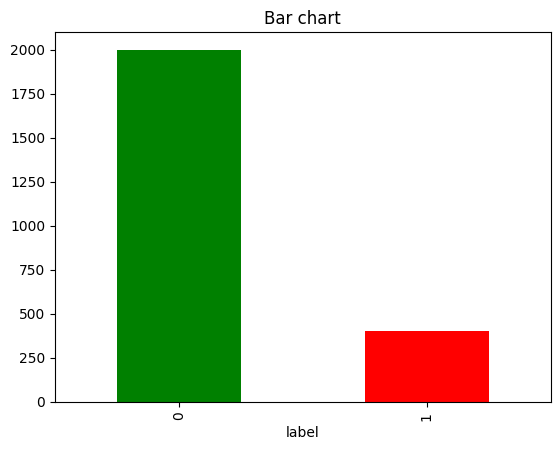

In [42]:
sentimen_data=pd.value_counts(data_label["label"], sort= True)
sentimen_data.plot(kind= 'bar', color= ["green", "red"])
plt.title('Bar chart')
plt.show()

Dapat dilihat bahwa isi comments lebih banyak pada label sentimen 1 atau comments dengan rating postitif ini berarti pelanggan yang menggunakan 

# Ratings

persentase rating yang diberikan kepada Facebook di Google Play Store:

In [43]:
#!pip install plotly==5.15.0

In [44]:
ratings = data["score"].value_counts()
numbers = ratings.index
quantity = ratings.values
import plotly.express as px
figure = px.pie(data, 
             values=quantity, 
             names=numbers,hole = 0.5)
figure.show()

Bisa dilihat rating facebook pada google play

In [45]:
data['Helpful'].value_counts()

Helpful
0      1408
1       167
2        69
3        54
4        34
       ... 
918       1
938       1
107       1
53        1
90        1
Name: count, Length: 318, dtype: int64

Disini dilihat apakah review bermanfaat 
helpful rating 1.0 lebih banyak dan menunjukkan bahwa tidak bermanfaat
sedangkan rating yang diatas 100.0 lebih sedikit tapi bermanfaat

In [46]:
pd.DataFrame(data.groupby('score')['Helpful'].mean())

,Helpful
score,
1,1405.235
2,857.840
3,258.700
4,891.650
5,147.490


In [47]:
pd.DataFrame(data.groupby('label')['Helpful'].mean())

,Helpful
label,
0,433.2675
1,519.5700


Hubungan Star rating dan Helpful

In [48]:
from wordcloud import WordCloud

# **Comments Negatif dan Positif**

Mencari dan menunjukkan data negatif atau positif

In [49]:
train_s0 = data_label[data_label["label"] == 0] #Negatif
train_s1 = data_label[data_label["label"] == 1] #Positf

In [50]:
train_s0["Comments_clean"] = train_s0["Comments_clean"].fillna("No Comments")
train_s1["Comments_clean"] = train_s1["Comments_clean"].fillna("No Comments")

In [51]:
train_s0

,Name,Comments_clean,label
1,Charity Muffley,ever sinc updat app noth seem work proper cant...,0
2,Dustin Harmon,app doesnt work time besid decept ad video pos...,0
3,Danielle Hopkins,im sure go late look marketplac watch reel scr...,0
4,Sarah Leather,there alway someth broken app featur hide page...,0
5,Eleanor Scott,ad hardest ad think make ad imposs everi time ...,0
...,...,...,...
1996,Rafie Mia,bad,0
1997,vikas gupta,oooo mool,0
1998,Bright Edwin,app make happi alway,0
1999,Md. Kamrul Hasan,,0


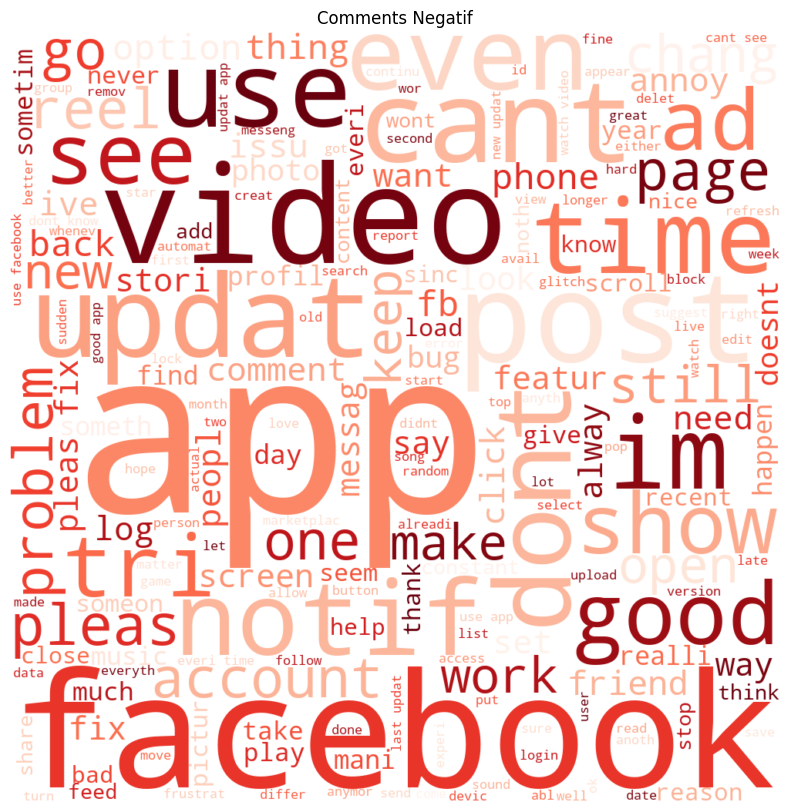

In [52]:
all_text_s0 = ' '.join(word for word in train_s0["Comments_clean"])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s0)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Comments Negatif")
plt.margins(x=0, y=0)
plt.show()

* Dari visualisasi diatas merupakan wordcloud kata yang paling banyak muncul pada isi comment yang memiliki label sentimen negatif.

In [53]:
train_s1

,Name,Comments_clean,label
2001,Stephanie Garsow,notic sometim option delet photo random someti...,1
2002,A Google user,app use okay annoy experi notic havent chang l...,1
2003,A Google user,fb simpl easi keep contact peopl reason im omi...,1
2004,Yunn Bachi,aim app interact howev interact disrupt due ma...,1
2005,Evan Kleve,recent develop everi time im scroll stop scrol...,1
...,...,...,...
2396,Jawed ali Iqubal,ea eamar satha eewa wtowz rd tx xaqvtbunaqvn c...,1
2397,rayjohn trajeco,awesom,1
2398,Dumbi Boipai,eg,1
2399,Kailsh Majhi,ok,1


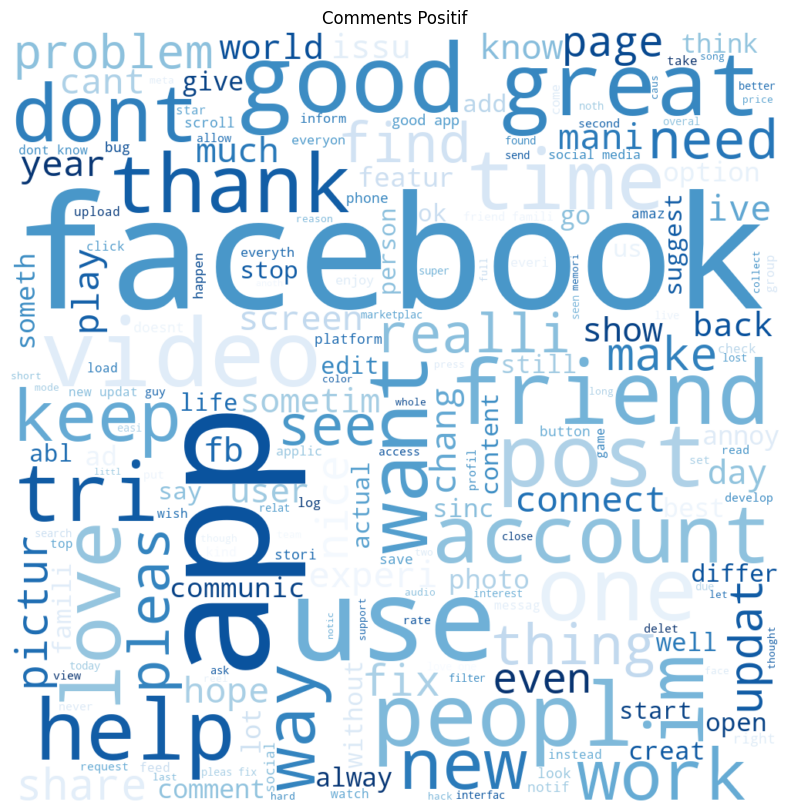

In [54]:
all_text_s1 = ' '.join(word for word in train_s1["Comments_clean"])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s1)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Comments Positif")
plt.margins(x=0, y=0)
plt.show()

* Dari visualisasi diatas merupakan wordcloud kata yang paling banyak muncul pada comments yang memiliki label sentimen positif.

# Menyiapkan Data Train dan Test

Pada proses ini saya menggunakan library sklearn.model_selection dengan modul train_test _split untuk membagi data latih (X_train dan y_train) dan data uji (X_test dan y_test) dengan persentasi data latih 70% dan data uji 30% serta memilih label data yaitu yang merupakan variable independen dari data saya yaitu kolom label untuk dijadikan parameter klasifikasi prediksi.

In [55]:
data_label['Comments_clean'] = data_label['Comments_clean'].fillna("No Comments")

In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_label['Comments_clean'], data_label['label'], 
                                                    test_size=0.1, stratify=data_label['label'], random_state=30)

# Pembobotan Kata

Pada proses ini saya menggunakan pembobotan TF-IDF(term frequency–inverse document) untuk menghitung manual dengan menggunakan python pembobotan kata dalam dokumen data comments.

In [57]:
#import numpy as np

In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=2000, min_df=5, max_df=0.7, stop_words=stopwords.words('english'),ngram_range=(1,3))
#(decode_error='replace', encoding='utf-8')

In [59]:
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

print(X_train.shape)
print(X_test.shape)

(2160, 1271)
(240, 1271)


In [60]:
X_train = X_train.toarray()

In [61]:
X_test = X_test.toarray()

# Pengujian Data

Disini saya mencari pengujian pada confusion matriks dengan metode naive bayes. Lalu menghitung masing-masing kelas

In [62]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

In [63]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

#deklarasi metode cross validation
cv_method = RepeatedStratifiedKFold(n_splits=5,  n_repeats=3, random_state=999)
#tuning hyperparameter menggunakan gridsearch

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gscv_nb = GridSearchCV(estimator=nb, 
                 param_grid=params_NB, 
                 cv=cv_method,   # use any cross validation technique 
                 verbose=1, 
                 scoring='accuracy') 

#Fitting ke Model
gscv_nb.fit(X_train,y_train)
#mendapatkan hyperparameters terbaik
gscv_nb.best_params_

Fitting 15 folds for each of 100 candidates, totalling 1500 fits


{'var_smoothing': 1.0}

In [64]:
nb = GaussianNB(var_smoothing=1.0)

In [65]:
nb.fit(X_train, y_train)

GaussianNB(var_smoothing=1.0)

In [66]:
y_pred_nb = nb.predict(X_test)

In [67]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

print("Naive Bayes")
print('Accuracy  = ', round(accuracy_score(y_test, y_pred_nb)*100,2),'%')
print('Recall    = ', round(recall_score(y_test, y_pred_nb)*100,2),'%')
print('Precision = ', round(precision_score(y_test, y_pred_nb)*100,2),'%')
print('F1-Score  = ', round(f1_score(y_test, y_pred_nb)*100,2),'%')
print('ROC AUC   = ', roc_auc_score(y_test, y_pred_nb))

Naive Bayes
Accuracy  =  81.67 %
Recall    =  10.0 %
Precision =  33.33 %
F1-Score  =  15.38 %
ROC AUC   =  0.53


In [68]:
print('--------------------- confusion matrix  ----------------------------')
print(confusion_matrix(y_test, y_pred_nb))
print('--------------------- classification report  ----------------------------')
print(classification_report(y_test, y_pred_nb))

--------------------- confusion matrix  ----------------------------
[[192   8]
 [ 36   4]]
--------------------- classification report  ----------------------------
              precision    recall  f1-score   support

           0       0.84      0.96      0.90       200
           1       0.33      0.10      0.15        40

    accuracy                           0.82       240
   macro avg       0.59      0.53      0.53       240
weighted avg       0.76      0.82      0.77       240



Setelah dilakukan pembagian data latih dan data uji serta pembobotan tf-idf selanjutnya dapat dilakukan proses klasifikasi prediksi menggunakan model algoritma Naïve Bayes

In [69]:
! ls -al /kaggle/working/

total 2348
drwxr-xr-x 2 root root    4096 Oct 19 15:28 .
drwxr-xr-x 6 root root    4096 Oct 19 15:27 ..
---------- 1 root root 1617499 Oct 19 15:29 __notebook__.ipynb
-rw-r--r-- 1 root root  168019 Oct 19 15:28 data_label.xlsx
-rw-r--r-- 1 root root  604653 Oct 19 15:28 facebook_text.xlsx
